In [3]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [5]:
path = 'hotel_bookings.1.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [7]:
df.shape

(119390, 32)

In [8]:
df.columns.values.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
df.isnull().any().any()

True

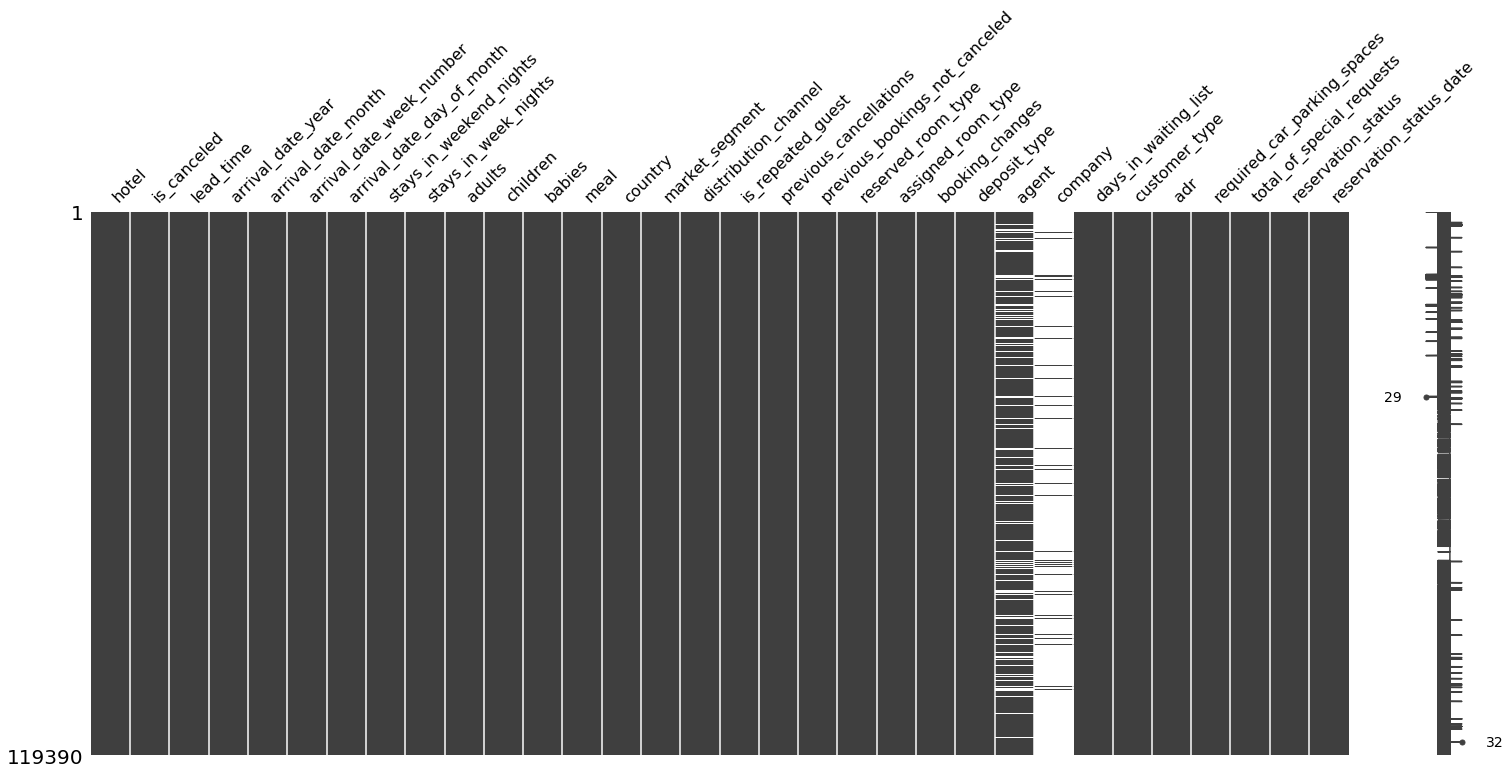

In [11]:
msno.matrix(df)

In [12]:
df.replace({' ': np.nan}, inplace=True)

In [13]:
df.isnull().any().any()

True

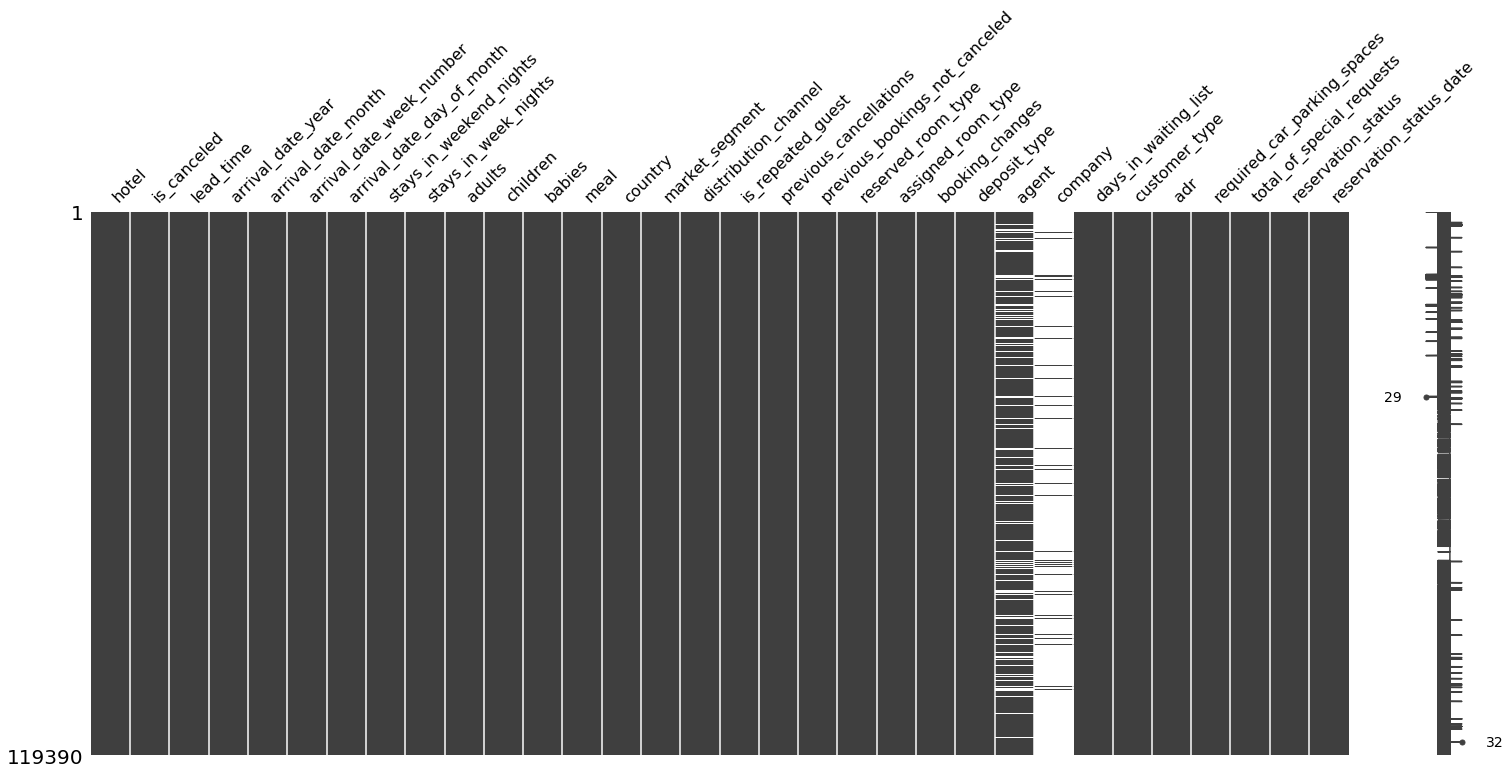

In [14]:
msno.matrix(df)

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
df.is_canceled.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
df['is_canceled'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
df.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


In [20]:
df.groupby('is_canceled').agg(['count', 'size', 'nunique']).stack()

hotel  lead_time  arrival_date_year  arrival_date_month  \
is_canceled                                                                    
0           count    75166      75166              75166               75166   
            size     75166      75166              75166               75166   
            nunique      2        422                  3                  12   
1           count    44224      44224              44224               44224   
            size     44224      44224              44224               44224   
            nunique      2        465                  3                  12   

                     arrival_date_week_number  arrival_date_day_of_month  \
is_canceled                                                                
0           count                       75166                      75166   
            size                        75166                      75166   
            nunique                        53                         31   
1           count                       44224                      44224   
            size                        44224                      44224   
            nunique                        53                         31   

                     stays_in_weekend_nights  stays_in_week_nights  adults  \
is_canceled                                                                  
0           count                      75166                 75166   75166   
            size                       75166                 75166   75166   
            nunique                       17                    33       5   
1           count                      44224                 44224   44224   
            size                       44224                 44224   44224   
            nunique                       13                    26      14   

                     children  ...  deposit_type  agent  company  \
is_canceled                    ...                                 
0           count       75166  ...         75166  62856     5606   
            size        75166  ...         75166  75166    75166   
            nunique         4  ...             3    314      331   
1           count       44220  ...         44224  40194     1191   
            size        44224  ...         44224  44224    44224   
            nunique         5  ...             3    217      149   

                     days_in_waiting_list  customer_type    adr  \
is_canceled                                                       
0           count                   75166          75166  75166   
            size                    75166          75166  75166   
            nunique                    98              4   7610   
1           count                   44224          44224  44224   
            size                    44224          44224  44224   
            nunique                   105              4   3941   

                     required_car_parking_spaces  total_of_special_requests  \
is_canceled                                                                   
0           count                          75166                      75166   
            size                           75166                      75166   
            nunique                            5                          6   
1           count                          44224                      44224   
            size                           44224                      44224   
            nunique                            1                          6   

                     reservation_status  reservation_status_date  
is_canceled                                                       
0           count                 75166                    75166  
            size                  75166                    75166  
            nunique                   1                      805  
1           count                 44224                    44224  
            size             

In [21]:
df.groupby('is_canceled').agg(['count', 'size', 'nunique'])

hotel                lead_time                arrival_date_year  \
             count   size nunique     count   size nunique             count   
is_canceled                                                                    
0            75166  75166       2     75166  75166     422             75166   
1            44224  44224       2     44224  44224     465             44224   

                           arrival_date_month  ...  \
              size nunique              count  ...   
is_canceled                                    ...   
0            75166       3              75166  ...   
1            44224       3              44224  ...   

            required_car_parking_spaces total_of_special_requests         \
                                nunique                     count   size   
is_canceled                                                                
0                                     5                     75166  75166   
1                                     1                     44224  44224   

                    reservation_status                reservation_status_date  \
            nunique              count   size nunique                   count   
is_canceled                                                                     
0                 6              75166  75166       1                   75166   
1                 6              44224  44224       2                   44224   

                            
              size nunique  
is_canceled                 
0            75166     805  
1            44224     902  

[2 rows x 93 columns]

In [22]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8030,Resort Hotel,1,238,2016,September,37,7,0,3,1,...,Non Refund,1.0,NaN,0,Transient,89.00,0,0,Canceled,2016-02-09
37532,Resort Hotel,0,33,2017,June,25,19,1,1,2,...,No Deposit,240.0,NaN,0,Transient,154.00,1,1,Check-Out,2017-06-21
76865,City Hotel,1,239,2015,October,42,17,0,1,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2015-08-17
1960,Resort Hotel,0,64,2015,September,39,24,0,3,2,...,No Deposit,240.0,NaN,0,Transient,80.10,0,2,Check-Out,2015-09-27
98971,City Hotel,0,34,2016,October,41,2,2,3,2,...,No Deposit,7.0,NaN,0,Transient,95.47,0,1,Check-Out,2016-10-07


In [23]:
df.shape

(119390, 32)

In [24]:
df_copy = df.copy()
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
df_dropped = df.dropna(subset=['is_canceled'])
df_dropped.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df_dropped['adr'].dtype

dtype('float64')

In [28]:
df_dropped['adr'].mean() 

101.83112153446453

In [31]:
df_copy['adr'].fillna(value=np.round(df['adr'].mean(),decimals=0), inplace=True)

In [32]:
df_copy.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


In [33]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8030,Resort Hotel,1,238,2016,September,37,7,0,3,1,...,Non Refund,1.0,NaN,0,Transient,89.00,0,0,Canceled,2016-02-09
37532,Resort Hotel,0,33,2017,June,25,19,1,1,2,...,No Deposit,240.0,NaN,0,Transient,154.00,1,1,Check-Out,2017-06-21
76865,City Hotel,1,239,2015,October,42,17,0,1,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2015-08-17
1960,Resort Hotel,0,64,2015,September,39,24,0,3,2,...,No Deposit,240.0,NaN,0,Transient,80.10,0,2,Check-Out,2015-09-27
98971,City Hotel,0,34,2016,October,41,2,2,3,2,...,No Deposit,7.0,NaN,0,Transient,95.47,0,1,Check-Out,2016-10-07


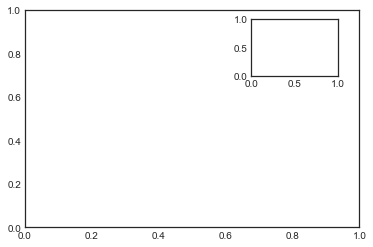

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

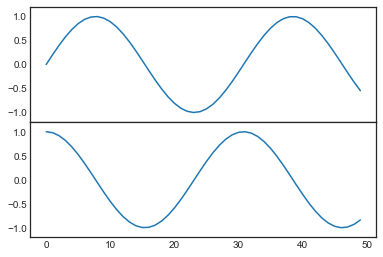

In [35]:

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

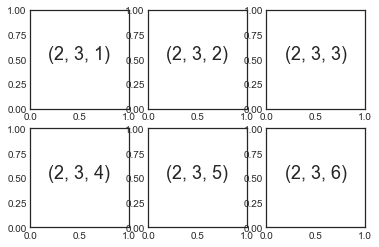

In [36]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

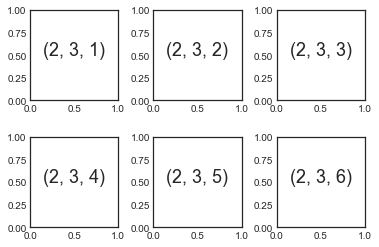

In [37]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

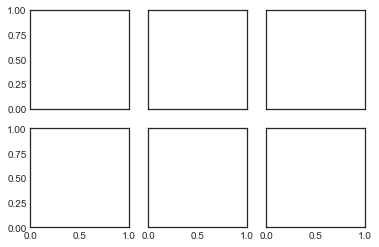

In [38]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

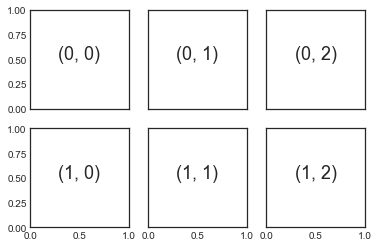

In [39]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

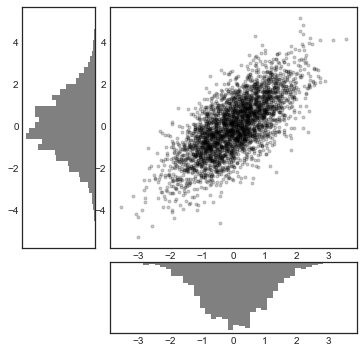

In [40]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Frequency of arrival_date_year')

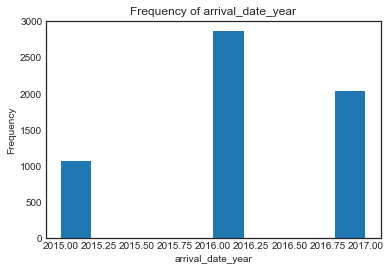

In [46]:

plt.hist(df_sample['arrival_date_year'])
plt.xlabel('arrival_date_year')
plt.ylabel('Frequency')
plt.title('Frequency of arrival_date_year')

Text(0.5, 1.0, 'Box Plot of arrival_date_week_number count')

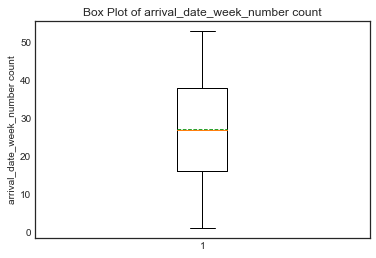

In [47]:
plt.boxplot(df_sample['arrival_date_week_number'], showmeans=True, meanline=True)
plt.ylabel('arrival_date_week_number count')
plt.title('Box Plot of arrival_date_week_number count')